In [1]:
import numpy as np
import os
import math
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
from numpy import asarray
from pylab import rcParams
from scipy import interpolate, optimize
from scipy.interpolate import UnivariateSpline
import scipy
from matplotlib.pyplot import *
from numpy import *

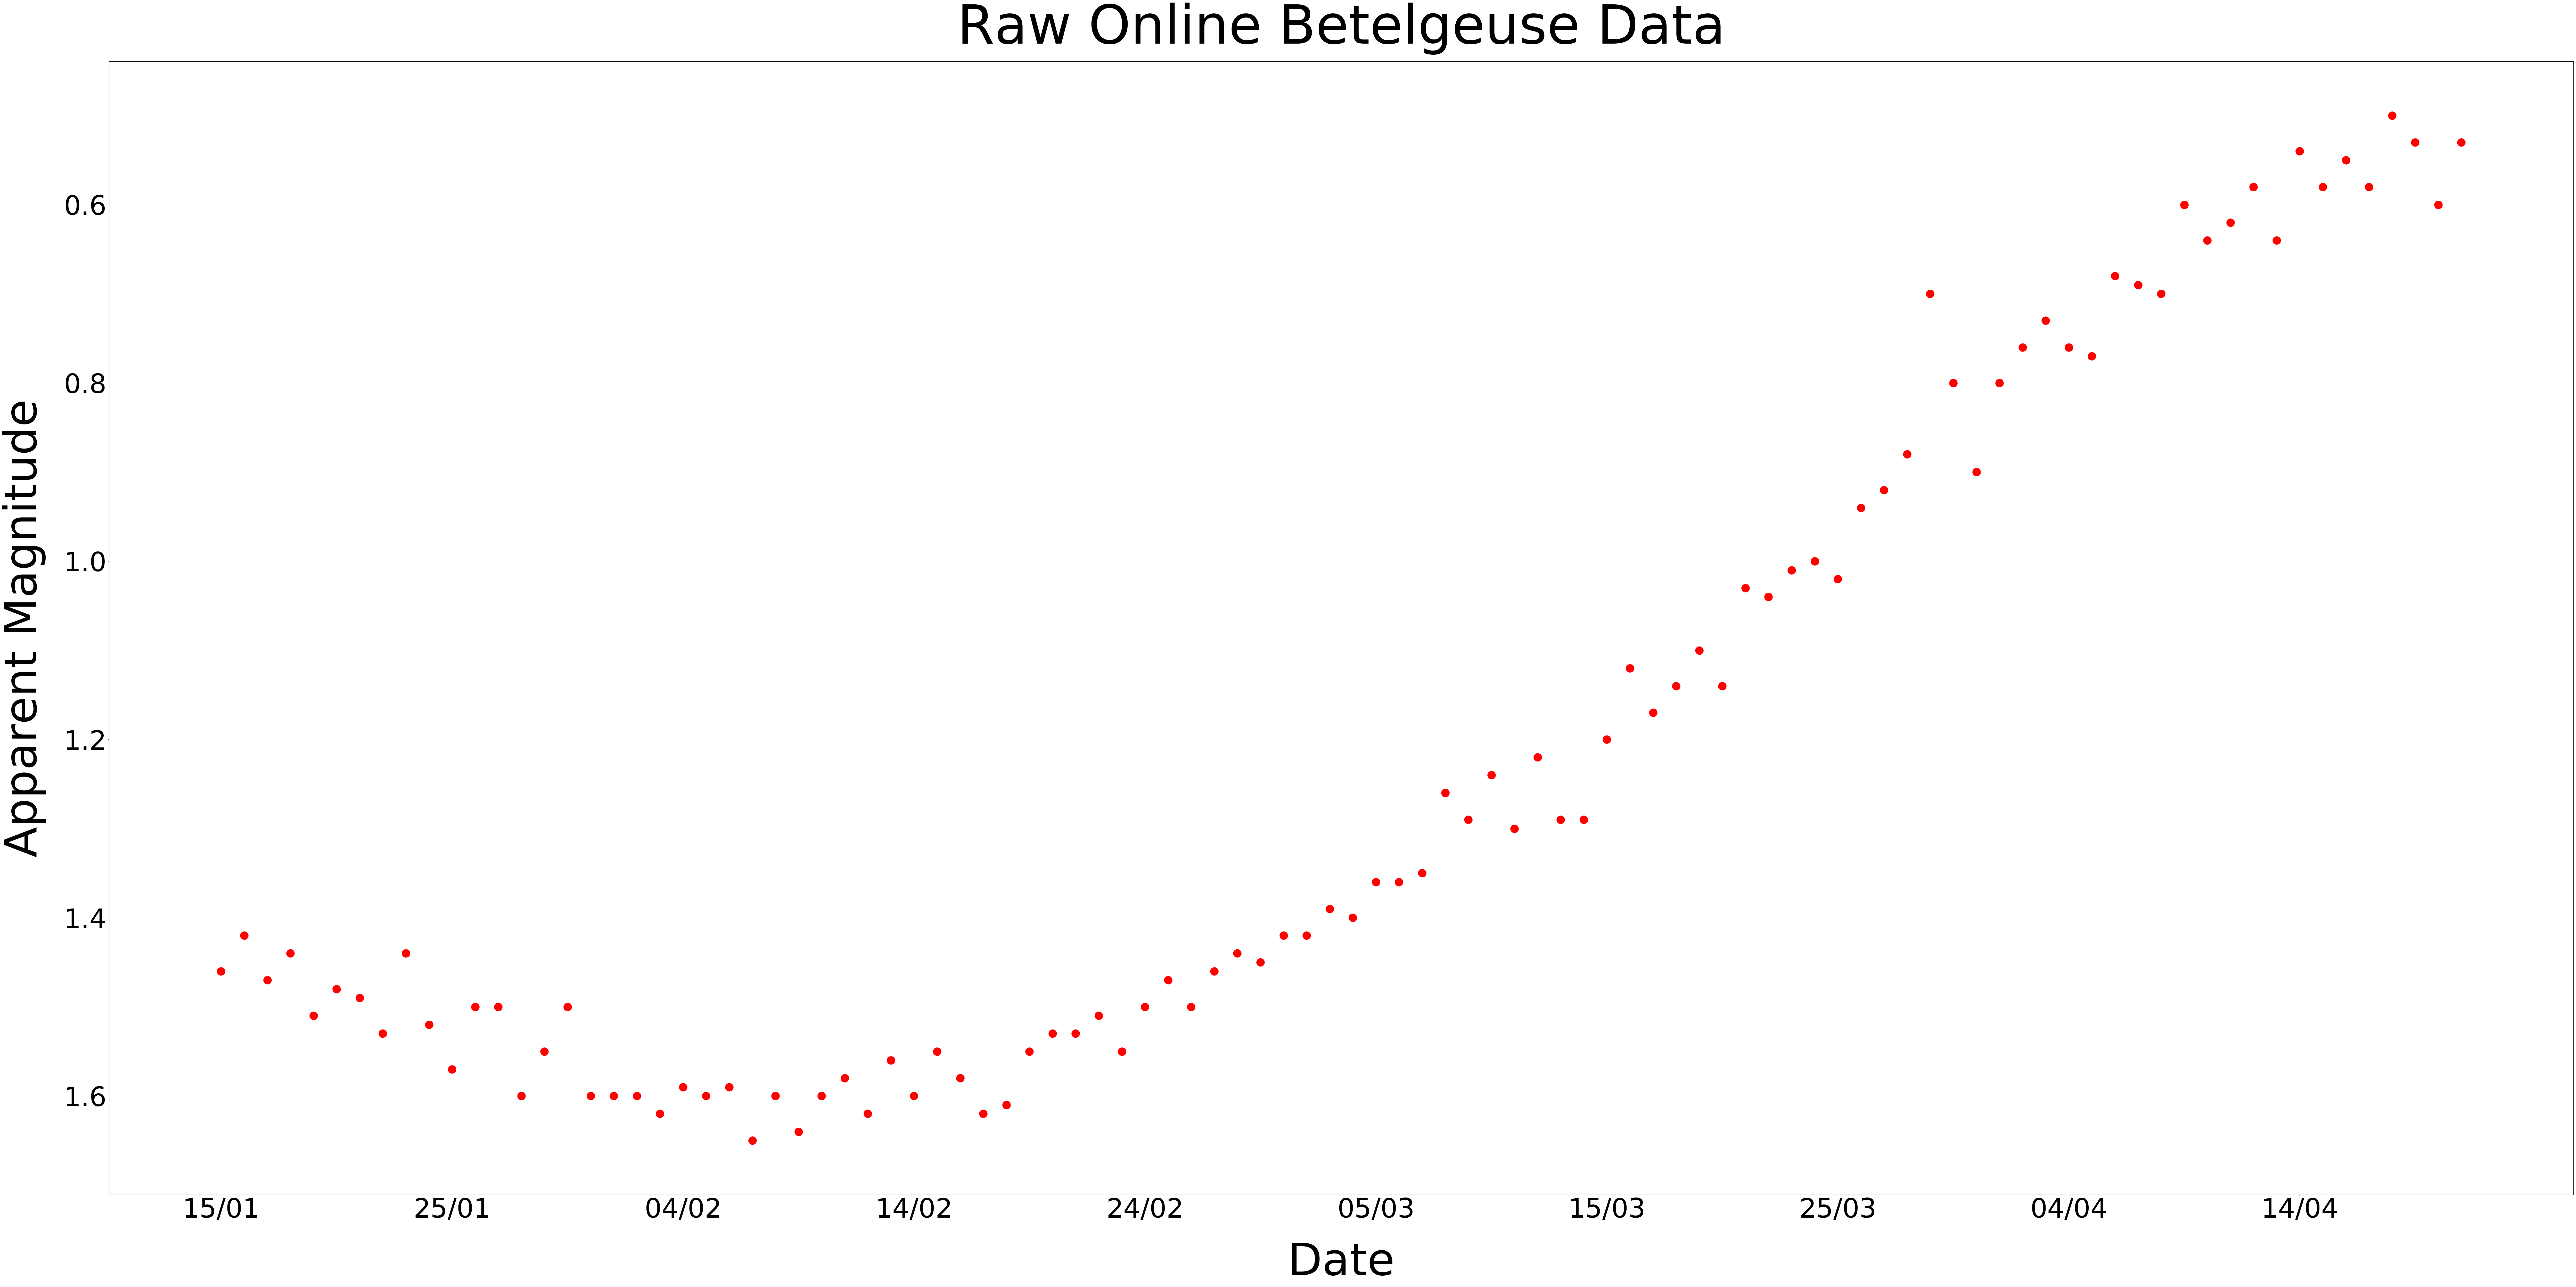

In [2]:
dates = (["15/01","16/01","17/01","18/01","19/01","20/01","21/01","22/01","23/01","24/01","25/01","26/01","27/01","28/01",
          "29/01","30/01","31/01","01/02","02/02","03/02","04/02","05/02","06/02","07/02","08/02","09/02","10/02","11/02",
          "12/02","13/02","14/02","15/02","16/02","17/02","18/02","19/02","20/02","21/02","22/02","23/02","24/02","25/02",
          "26/02","27/02","28/02","29/02","01/03","02/03","03/03","04/03","05/03","06/03","07/03","08/03","09/03","10/03",
          "11/03","12/03","13/03","14/03","15/03","16/03","17/03","18/03","19/03","20/03","21/03","22/03","23/03","24/03",
          "25/03","26/03","27/03","28/03","29/03","30/03","31/03","01/04","02/04","03/04","04/04","05/04","06/04","07/04",
          "08/04","09/04","10/04","11/04","12/04","13/04","14/04","15/04","16/04","17/04",'18/04',"19/04","20/04","21/04"]) 
values = ([1.46,1.42,1.47,1.44,1.51,1.48,1.49,1.53,1.44,1.52,1.57,1.5,1.5,1.6,1.55,1.5,1.6,1.6,1.6,1.62,1.59,1.6,1.59,1.65,
           1.6,1.64,1.6,1.58,1.62,1.56,1.6,1.55,1.58,1.62,1.61,1.55,1.53,1.53,1.51,1.55,1.5,1.47,1.5,1.46,1.44,1.45,1.42,
           1.42,1.39,1.4,1.36,1.36,1.35,1.26,1.29,1.24,1.3,1.22,1.29,1.29,1.2,1.12,1.17,1.14,1.1,1.14,1.03,1.04,1.01,1,1.02,
           0.94,0.92,0.88,0.7,0.8,0.9,0.8,0.76,0.73,0.76,0.77,0.68,0.69,0.7,0.6,0.64,0.62,0.58,0.64,0.54,0.58,0.55,0.58,0.5,
           0.53,0.6,0.53])

matplotlib.rc('xtick', labelsize=75) 
matplotlib.rc('ytick', labelsize=75) 
plt.figure(figsize=(100,50))
ax = plt.scatter(dates,values,s=500,color="red")
ax=plt.gca()
ax.invert_yaxis()
ax.set_xticks(ax.get_xticks()[::10])
plt.xlabel('Date', fontdict = {'fontsize' : 125},labelpad=50)
plt.ylabel('Apparent Magnitude', fontdict = {'fontsize' : 125}, labelpad=50)
plt.title("Raw Online Betelgeuse Data",fontdict = {'fontsize' : 150},pad=50)
plt.tight_layout()
plt.show()

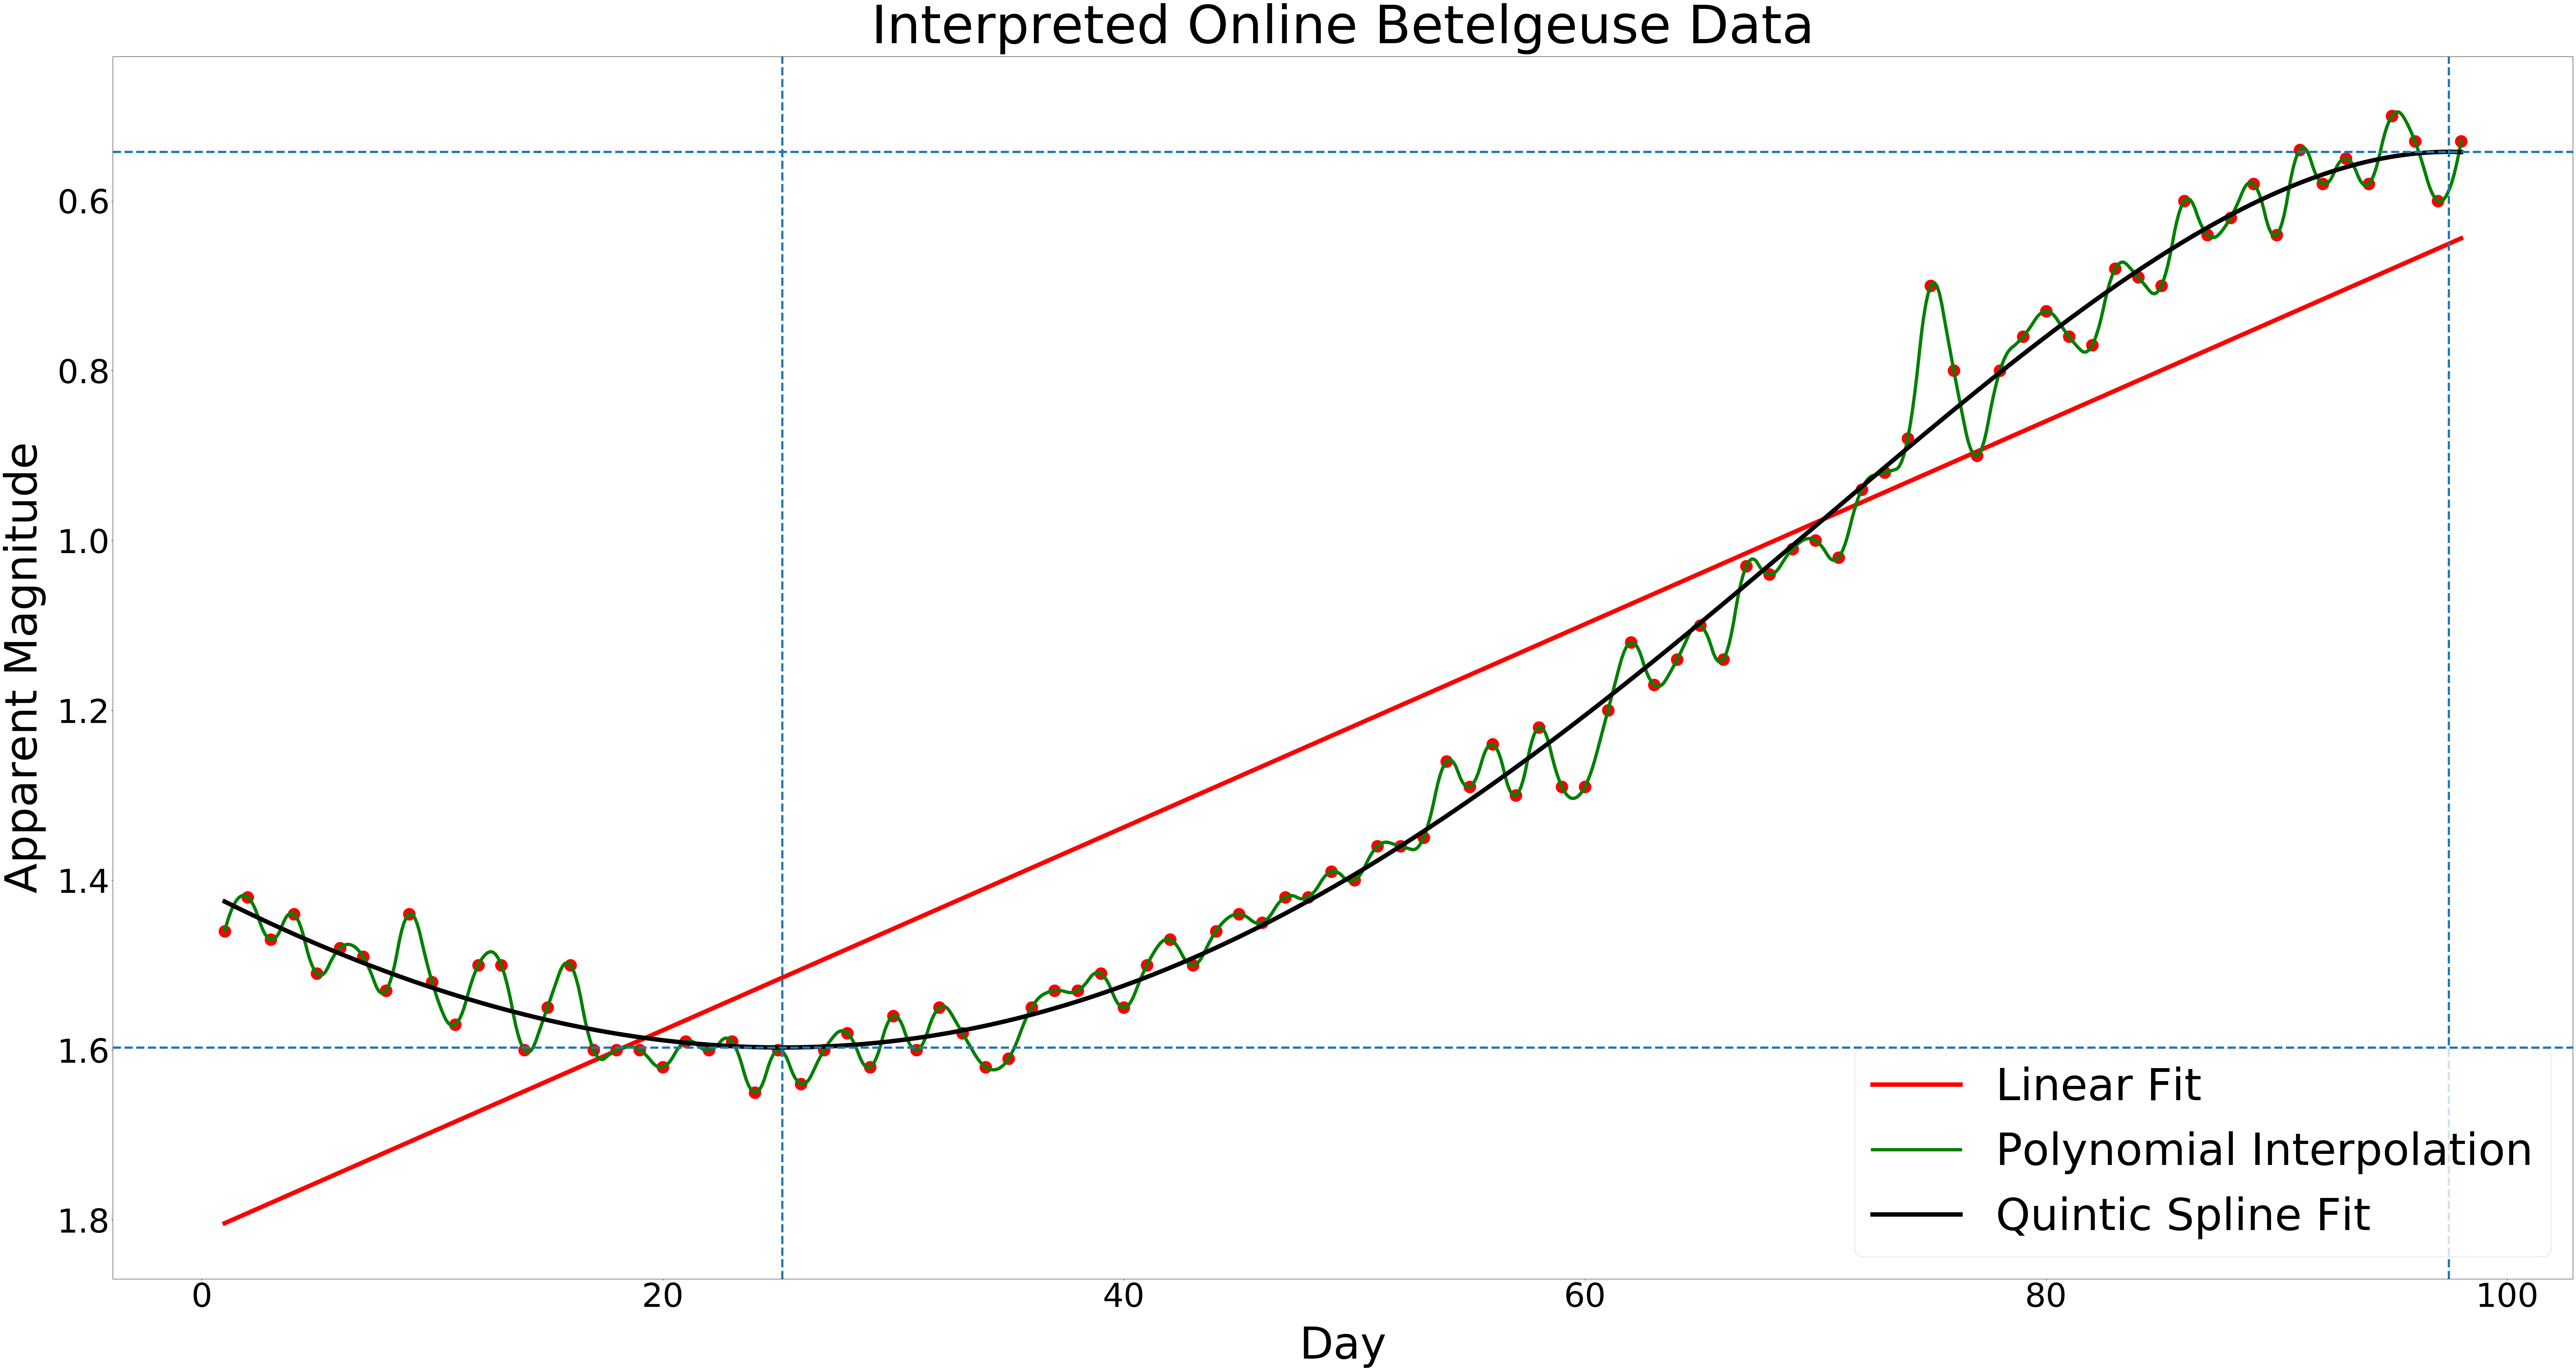

Lowest Average Magnitude is 1.60 , on Day 25 : 08/02
Highest Average Magnitude is 0.54 , on Day 97 : 20/04

Error of Cubic Fit = 1.0139e-16
Error of Quartic Fit = 2.7642e-16
Error of Quintic Fit = 0.0000e+00

Linear Fit Gradient = 0.012
Error of Linear Fit = 1.4954e-16


In [11]:
xr = arange(1,len(dates)+1)
yr = values

spl3 = UnivariateSpline(xr, yr,k=3)
spl4 = UnivariateSpline(xr, yr,k=4)
spl5 = UnivariateSpline(xr, yr,k=5)
xdr = linspace(1,xr.max(),1000)

ft = interpolate.interp1d(xr, yr,'quadratic')
fitlist = ft(xdr)

check = linspace(1,xr.max(),len(xr))
c3 = abs(average(spl3(check)-yr))
c4 = abs(average(spl4(check)-yr))
c5 = abs(average(spl5(check)-yr))

def k(x,y,z):
    if x < y and x < z:
        return spl3
    if y < x and y < z:
        return spl4
    if z < x and z < y:
        return spl5
        
res1 = k(c3,c4,c5)

def name(x,y,z):
    if x < y and x < z:
        return "Cubic"
    if y < x and y < z:
        return "Quartic"
    if z < x and z < y:
        return "Quintic"

res2 = name(c3,c4,c5)

matplotlib.rc('xtick', labelsize=75) 
matplotlib.rc('ytick', labelsize=75) 
plt.figure(figsize=(100,50))
axr = plt.scatter(xr,yr,s=750,color="r")
plt.xlabel('Day', fontdict = {'fontsize' : 100},labelpad=25)
plt.ylabel('Apparent Magnitude', fontdict = {'fontsize' : 100}, labelpad=25)
mr, br = np.polyfit(xr, yr, 1)
plt.plot(xr, mr*xr + br,"r",linewidth=10,label='Linear Fit')
plot(xdr,fitlist,"g",linewidth=7.5,label='Polynomial Interpolation')
plot(xdr,res1(xdr),"k",linewidth=10,label=str(res2) + ' Spline Fit')
axr=plt.gca()
axr.invert_yaxis()
plt.title("Interpreted Online Betelgeuse Data",fontdict = {'fontsize' : 120},pad=30)

d3 = spl3.derivative()
d4 = spl4.derivative()
d5 = spl5.derivative()

def r1(x,y,z):
    if x < y and x < z:
        return scipy.optimize.newton(lambda x: float(d3(x)),25)
    if y < x and y < z:
        return scipy.optimize.newton(lambda x: float(d4(x)),25)
    if z < x and z < y:
        return scipy.optimize.newton(lambda x: float(d5(x)),25) 
    
def r2(x,y,z):
    if x < y and x < z:
        return scipy.optimize.newton(lambda x: float(d3(x)),105)
    if y < x and y < z:
        return scipy.optimize.newton(lambda x: float(d4(x)),105)
    if z < x and z < y:
        return scipy.optimize.newton(lambda x: float(d5(x)),105) 

res3 = r1(c3,c4,c5)
res4 = r2(c3,c4,c5)

def v1(x,y,z):
    if x < y and x < z:
        return float((spl3(res3)))
    if y < x and y < z:
        return float((spl4(res3)))
    if z < x and z < y:
        return float((spl5(res3)))
    
def v2(x,y,z):
    if x < y and x < z:
        return float(spl3(res4))
    if y < x and y < z:
        return float(spl4(res4))
    if z < x and z < y:
        return float(spl5(res4))
    
res5 = v1(c3,c4,c5)
res6 = v2(c3,c4,c5)

plt.axvline(x=res3,lw=5,ls='--')
plt.axvline(x=res4,lw=5,ls='--')
plt.axhline(y=res5,lw=5,ls='--')
plt.axhline(y=res6,lw=5,ls='--')

plt.legend(loc=0,fontsize=100)
plt.show()

print("Lowest Average Magnitude is","{0:.2f}".format(res5),", on Day",int(round(res3)),":",dates[int(round(res3))-1])
print("Highest Average Magnitude is","{0:.2f}".format(res6),", on Day",int(round(res4)),":",dates[int(round(res4))-1])
print()

check = linspace(1,xr.max(),len(xr))
c1 = average((mr*xr + br)-yr)

print("Error of Cubic Fit =",format(c3,'.4e'))
print("Error of Quartic Fit =",format(c4,'.4e'))
print("Error of Quintic Fit =",format(c5,'.4e'))
print()

print("Linear Fit Gradient =",round(abs(mr),4))
print("Error of Linear Fit =",format(abs(c1),'.4e'))

In [4]:
def findas(m,xs,ys):
    A= array([[0]*(m+1)]*(m+1))   
    b= array([0]*(m+1))          
    for k in range(m+1):          
        b[k]= sum(ys*xs**k)       
        for i in range(m+1):
            A[k,i]= sum(xs**(k+i)) 
    coefs= linalg.solve(A,b)              
    def fit(x):
        return sum(coefs*(x**array(range(len(coefs)))))
    return fit

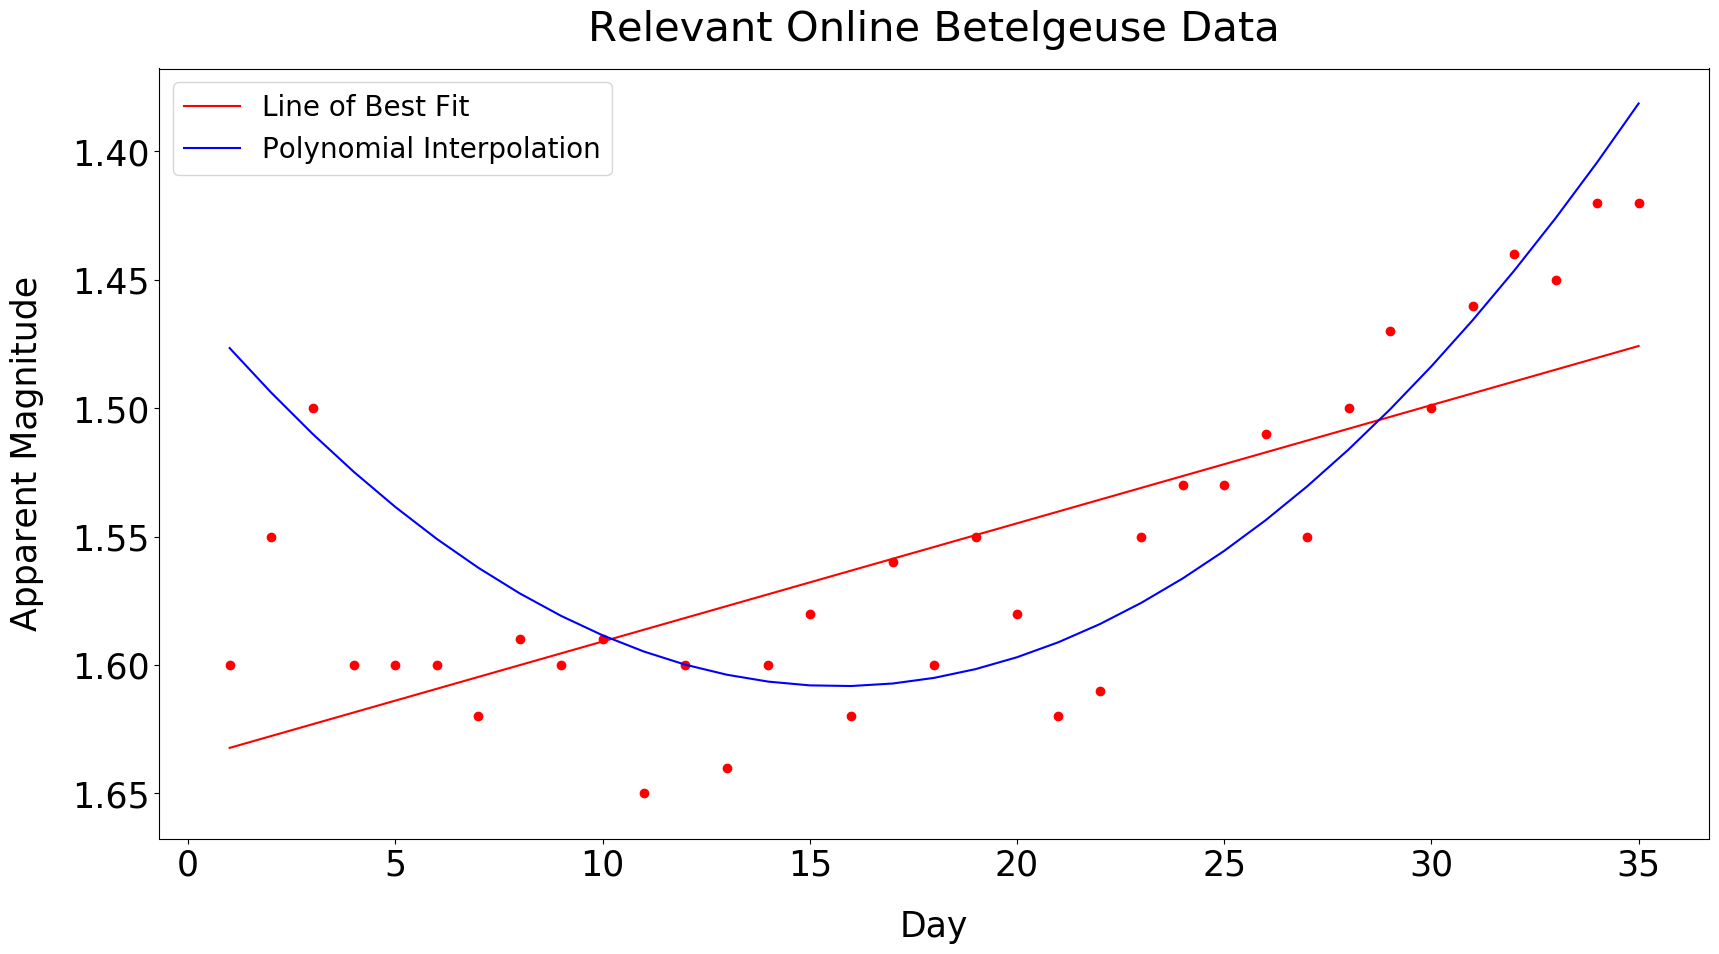

In [5]:
x1 = arange(1, 36)
y1 = ([1.6,1.55,1.5,1.6,1.6,1.6,1.62,1.59,1.6,1.59,1.65,1.6,1.64,1.6,1.58,1.62,1.56,1.6,1.55,1.58,1.62,1.61,1.55,1.53,1.53,1.51,
       1.55,1.5,1.47,1.5,1.46,1.44,1.45,1.42,1.42])

ft1 = findas(2,x1,y1)

xd1 = arange(1,36)
fitlist1 = list(map(lambda x: ft1(x),xd1))

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 
plt.figure(figsize=(20,10))
m1, b1 = np.polyfit(x1, y1, 1)
ax1 = plt.scatter(x1,y1,color="red")
plt.plot(x1, m1*x1 + b1,"r",label='Line of Best Fit')
plt.xlabel('Day', fontdict = {'fontsize' : 25},labelpad=20)
plt.ylabel('Apparent Magnitude', fontdict = {'fontsize' : 25}, labelpad=20)
plot(xd1,fitlist1,"b",label='Polynomial Interpolation')
ax1=plt.gca()
ax1.invert_yaxis()
plt.title("Relevant Online Betelgeuse Data",fontdict = {'fontsize' : 30},pad=20)

plt.legend(loc=2,fontsize=20)
plt.show()

In [6]:
C1 = 1.29397723187503
C2 = 1.0939899479916453
C3 = 1.207366525644165
C4 = 0.947509025809569
C5 = 1.7244605845038288

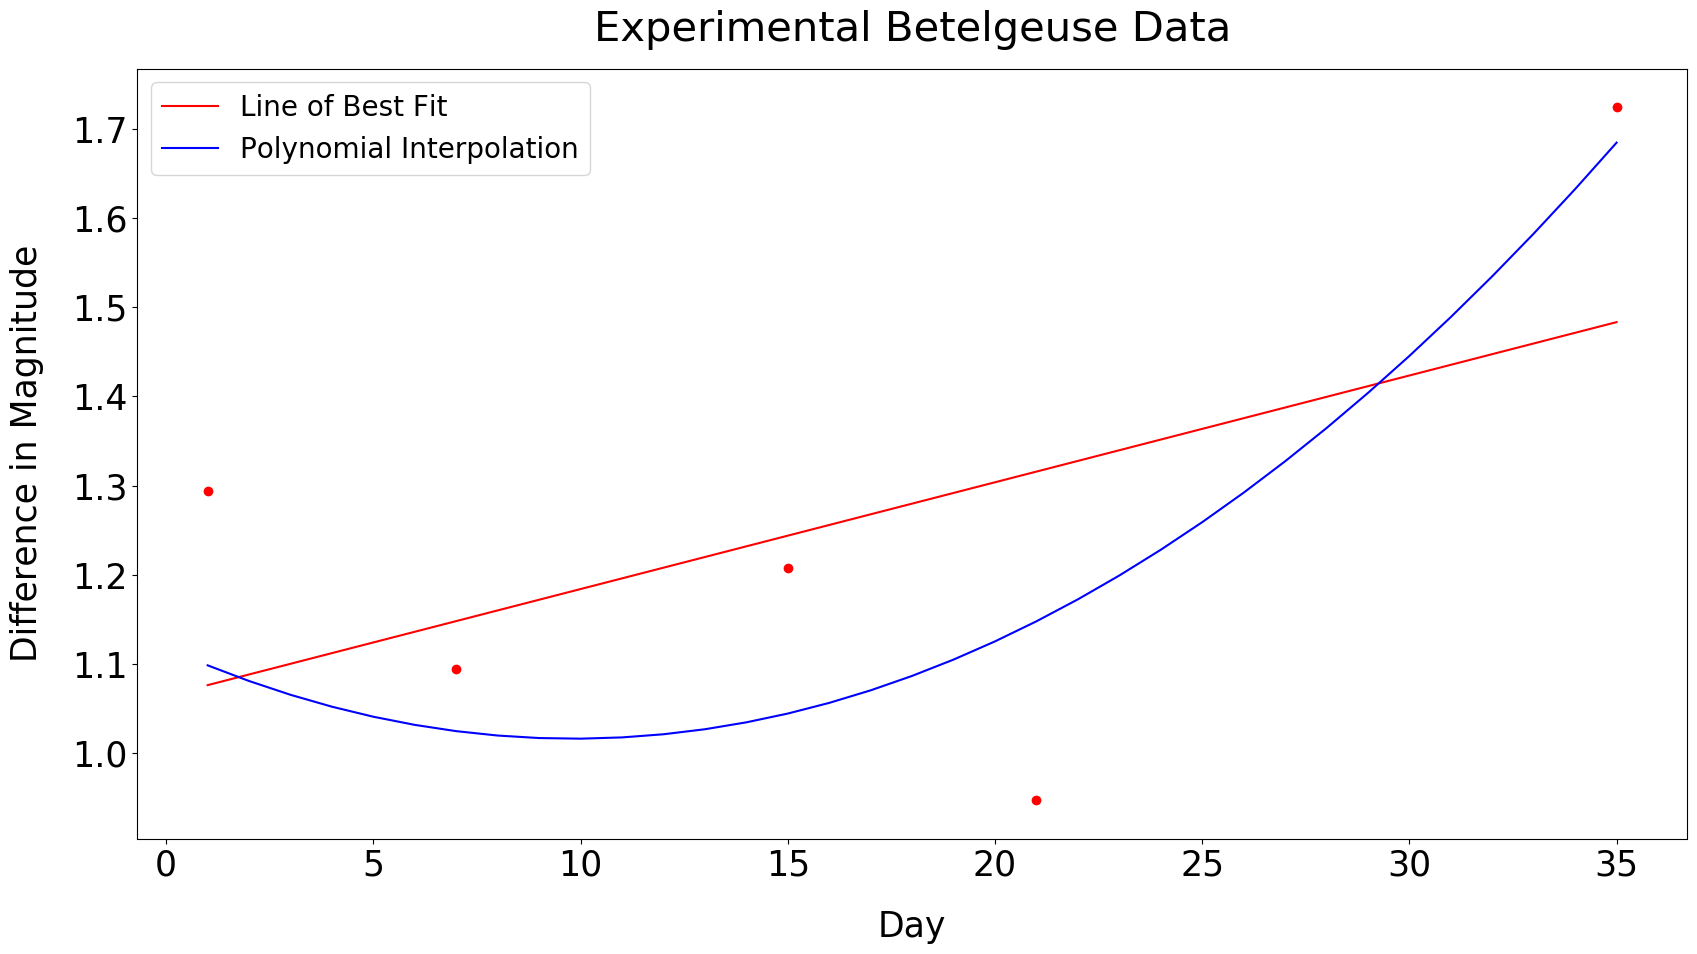

In [7]:
x2 = ([1,7,15,21,35])
y2 = ([C1,C2,C3,C4,C5])

ft2 = findas(2,np.array(x2),y2)

xd2 = arange(1,36)
fitlist2 = list(map(lambda x: ft2(x),xd2))

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 
plt.figure(figsize=(20,10))
m2, b2 = np.polyfit(x2, y2, 1)
ax2 = plt.scatter(x2,y2,color="red")
plt.plot(xd2, m2*xd2 + b2,"r",label='Line of Best Fit')
plt.xlabel('Day', fontdict = {'fontsize' : 25},labelpad=20)
plt.ylabel('Difference in Magnitude', fontdict = {'fontsize' : 25}, labelpad=20)
plot(xd2,fitlist2,"b",label='Polynomial Interpolation')
plt.legend(loc=2,fontsize=20)
plt.title("Experimental Betelgeuse Data",fontdict = {'fontsize' : 30},pad=20)
plt.show()

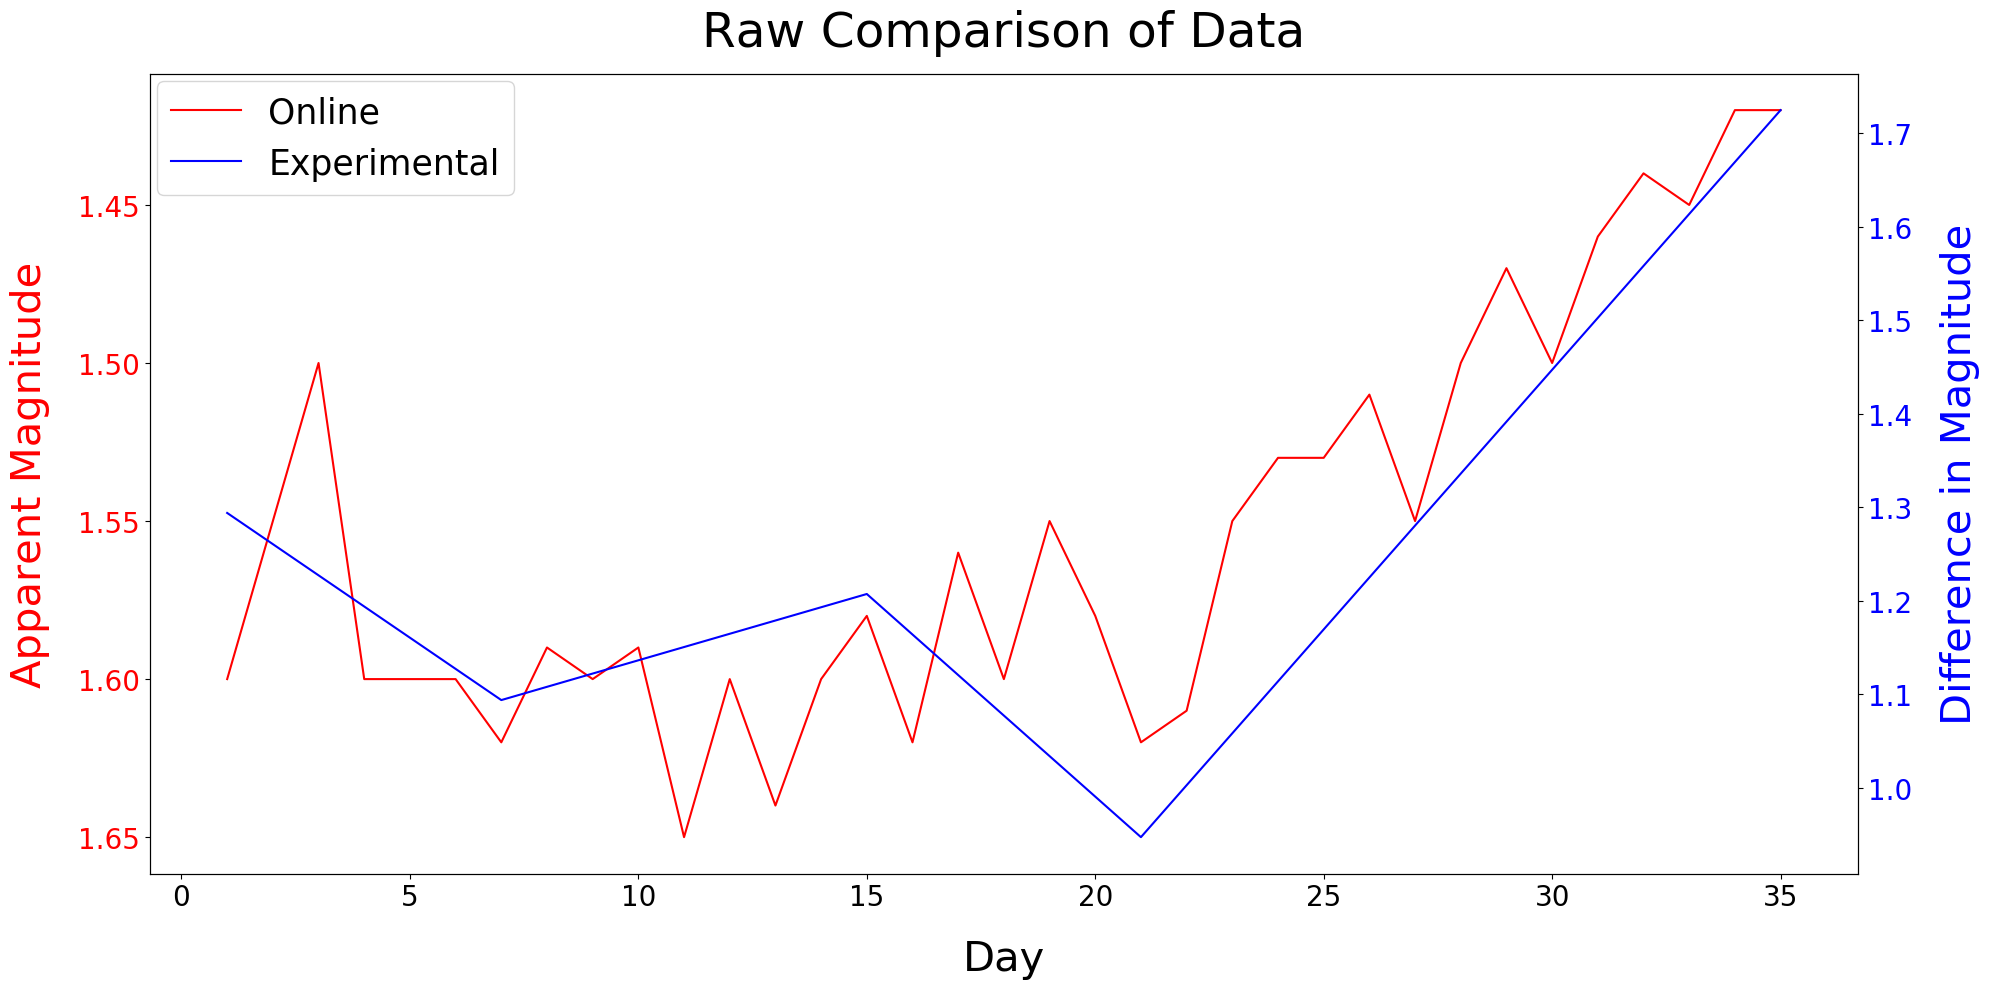

In [8]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'red'
ax1.set_xlabel('Day',fontdict = {'fontsize' : 30},labelpad=20)
ax1.set_ylabel('Apparent Magnitude', color=color,fontdict = {'fontsize' : 30},labelpad=20)
ax1.plot(x1, y1, color=color,label='Online')
ax1 = plt.gca()
ax1.invert_yaxis()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Difference in Magnitude', color=color,fontdict = {'fontsize' : 30},labelpad=20)
ax2.plot(x2, y2, color=color,label='Experimental')
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(loc=2, bbox_to_anchor=(0.07,0.925), fontsize=25)
plt.title("Raw Comparison of Data",fontdict = {'fontsize' : 35},pad=20)

fig.tight_layout()
plt.show()

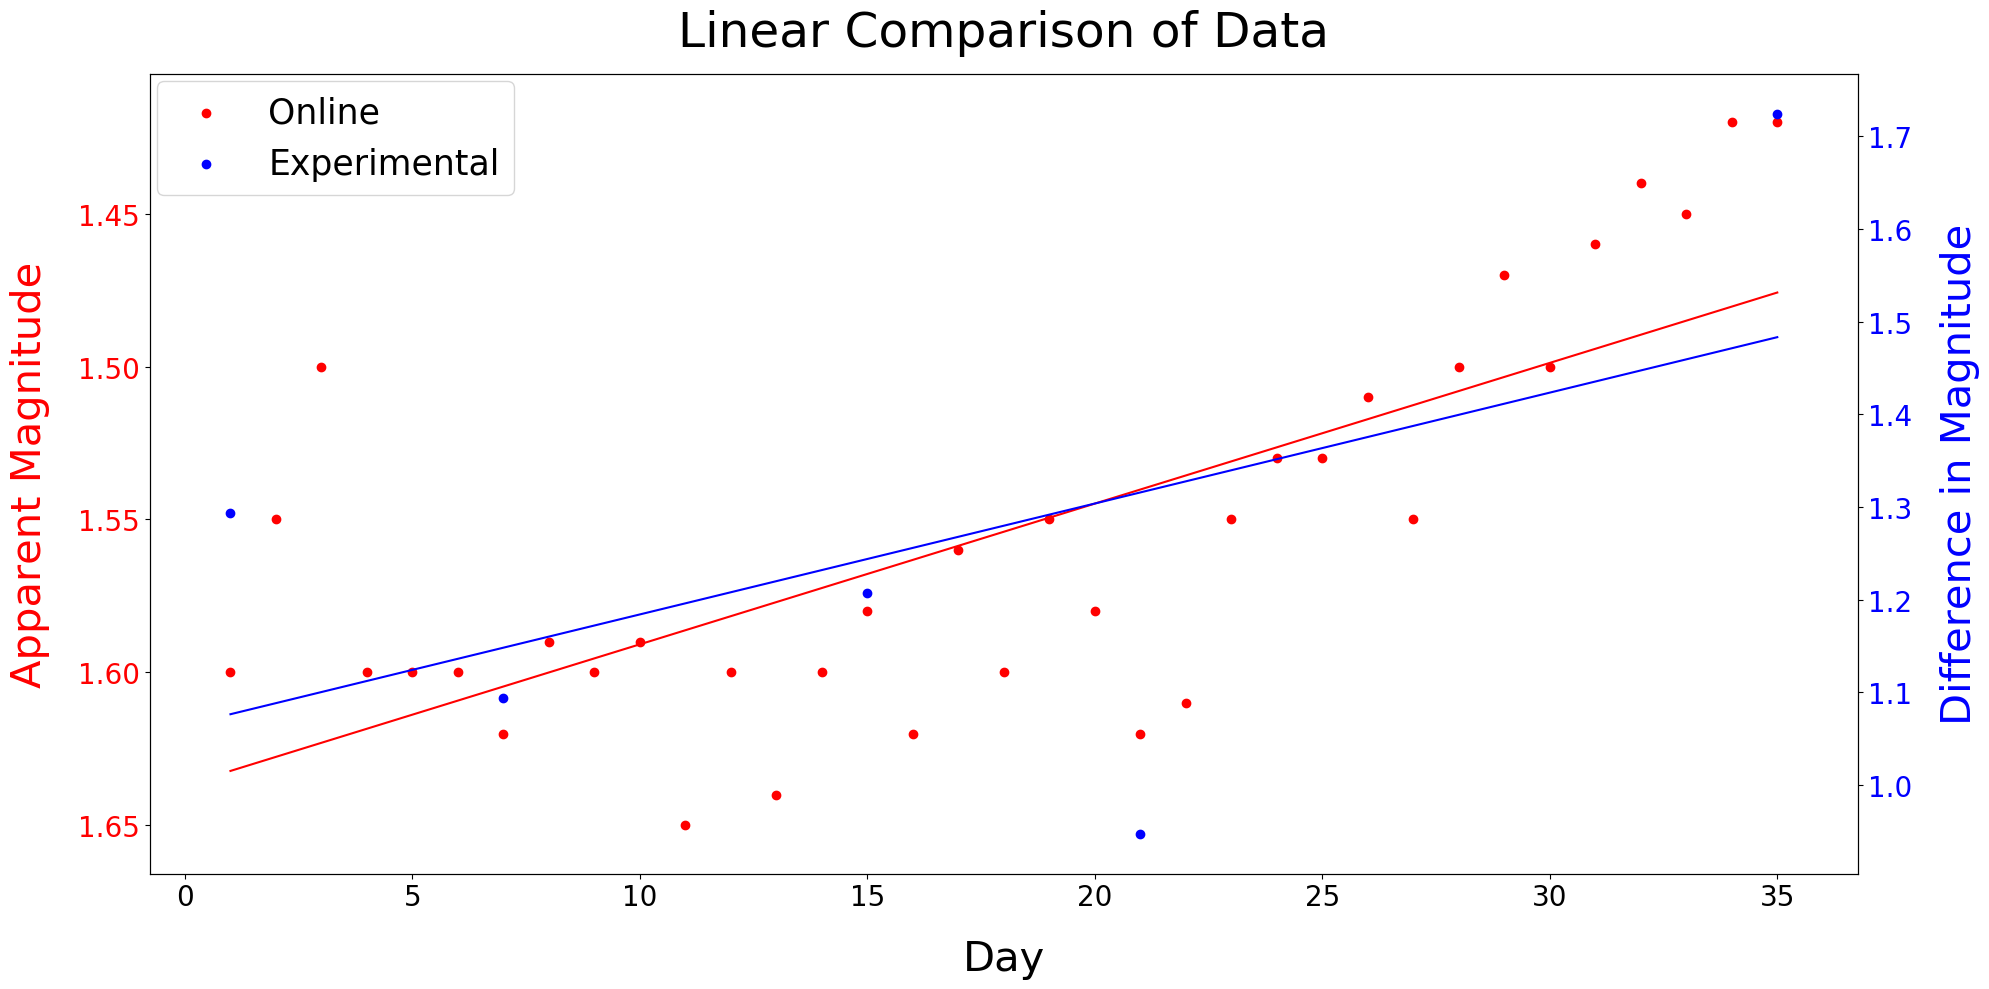

(-0.004602240896358573, 0.011970009183156785)

In [9]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'red'
ax1.set_xlabel('Day',fontdict = {'fontsize' : 30},labelpad=20)
ax1.set_ylabel('Apparent Magnitude', color=color,fontdict = {'fontsize' : 30},labelpad=20)
ax1.tick_params(axis='y', labelcolor=color)
m1, b1 = np.polyfit(x1, y1, 1)
ax1.scatter(x1, y1, color=color,label='Online')
ax1 = plt.gca()
ax1.invert_yaxis()
plt.plot(x1, m1*x1 + b1,"r")

ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Difference in Magnitude', color=color,fontdict = {'fontsize' : 30},labelpad=20)
ax2.tick_params(axis='y', labelcolor=color)
m2, b2 = np.polyfit(x2, y2, 1)
ax2.scatter(x2, y2, color=color,label='Experimental')
plt.plot(x2, m2*np.array(x2) + b2,"b")

fig.legend(loc=2, bbox_to_anchor=(0.07,0.925), fontsize=25)
plt.title("Linear Comparison of Data",fontdict = {'fontsize' : 35},pad=20)

fig.tight_layout()
plt.show()

m1,m2

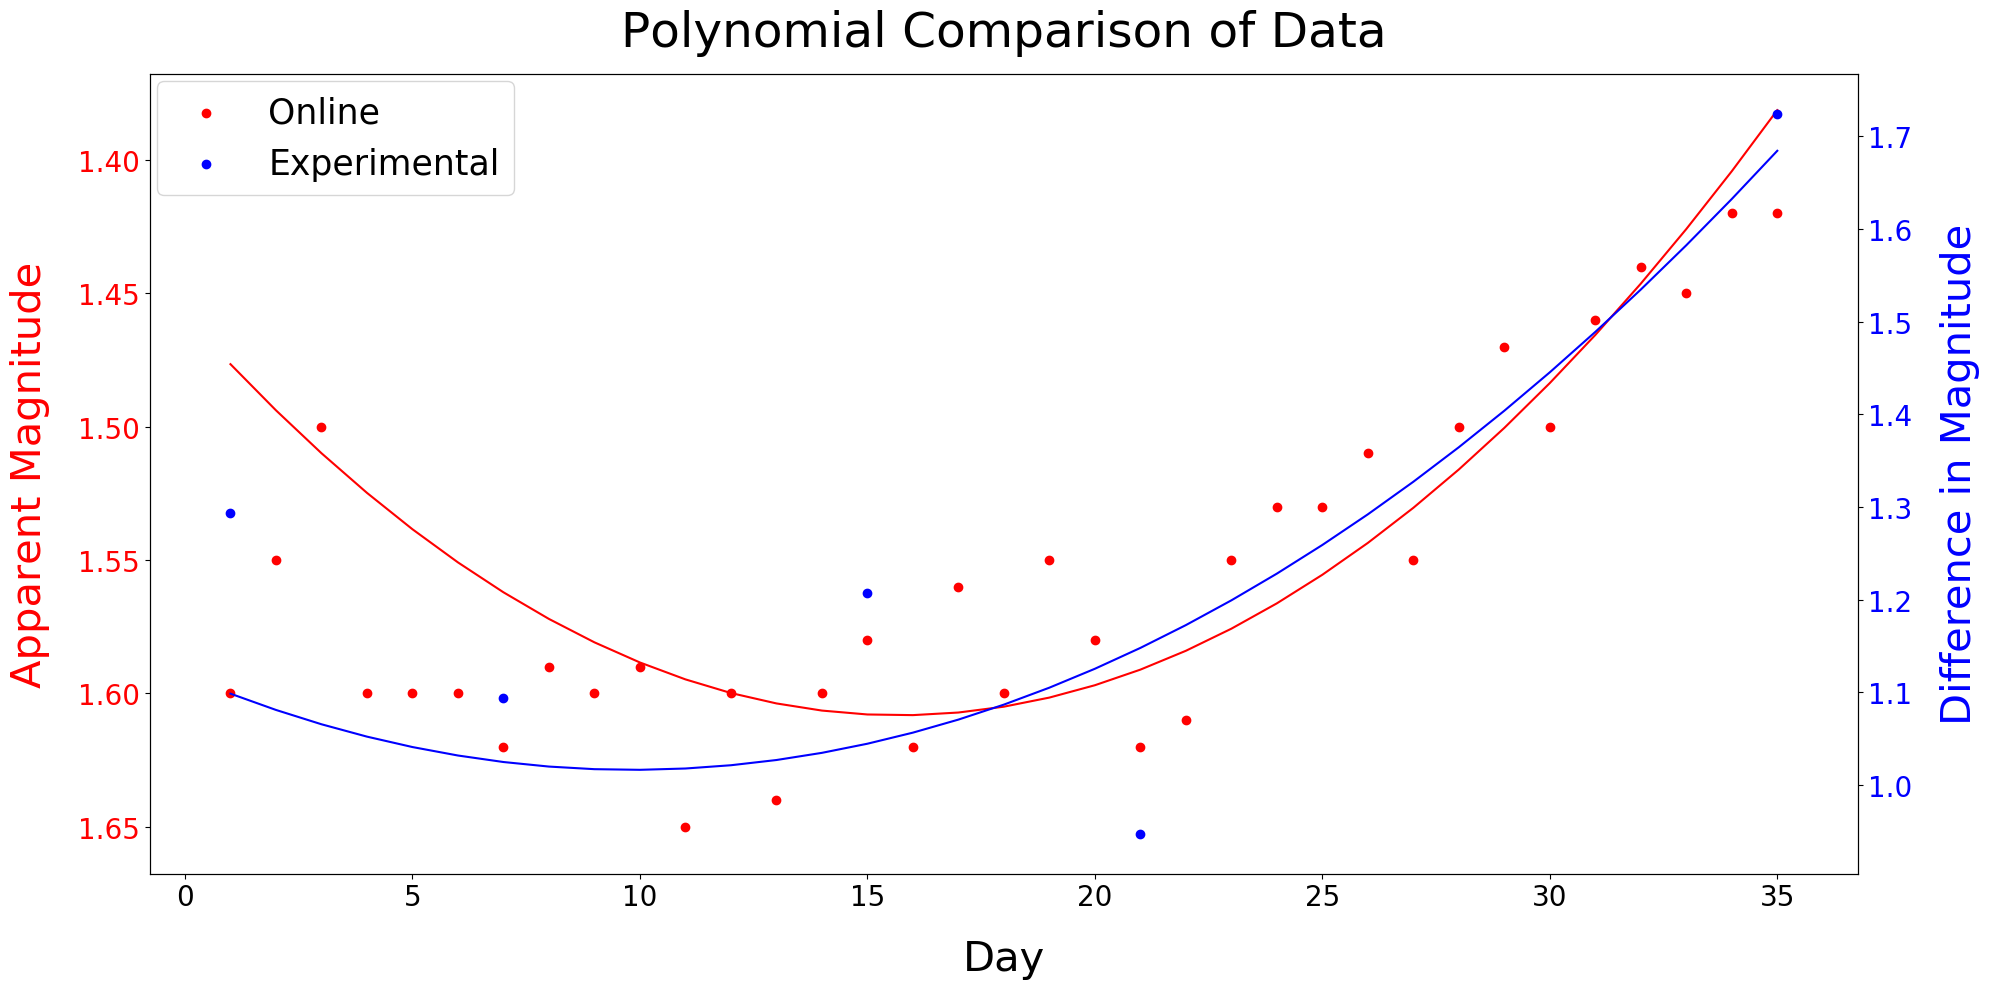

In [10]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'red'
ax1.set_xlabel('Day',fontdict = {'fontsize' : 30},labelpad=20)
ax1.set_ylabel('Apparent Magnitude', color=color,fontdict = {'fontsize' : 30},labelpad=20)
ax1.tick_params(axis='y', labelcolor=color)
ax1.scatter(x1, y1, color=color,label='Online')
ax1 = plt.gca()
ax1.invert_yaxis()
plt.plot(xd1,fitlist1,"r")

ax2 = ax1.twinx()

color = 'blue'
ax2.set_ylabel('Difference in Magnitude', color=color,fontdict = {'fontsize' : 30},labelpad=20)
ax2.tick_params(axis='y', labelcolor=color)
ax2.scatter(x2, y2, color=color,label='Experimental')
plt.plot(xd2,fitlist2,"b")

fig.legend(loc=2, bbox_to_anchor=(0.07,0.925), fontsize=25)
plt.title("Polynomial Comparison of Data",fontdict = {'fontsize' : 35},pad=20)

fig.tight_layout()
plt.show()